In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
######################################
files = '/Report/combined_summary_final.csv'
df = pd.read_csv(files)

In [6]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'gray','olive', 'cyan']
names = ['Maize', 'Millet', 'Guizota', 'Teff', 'Others', 'OA', 'F-1']

In [7]:
datasets = ['RF','SVM', 'RNN','LSTM','Transformer', 'InceptionTime','TempCNN', 'TempCNNContrastive']
palete = {}
for i in range(len(colors)):
    palete[datasets[i]] = colors[i]

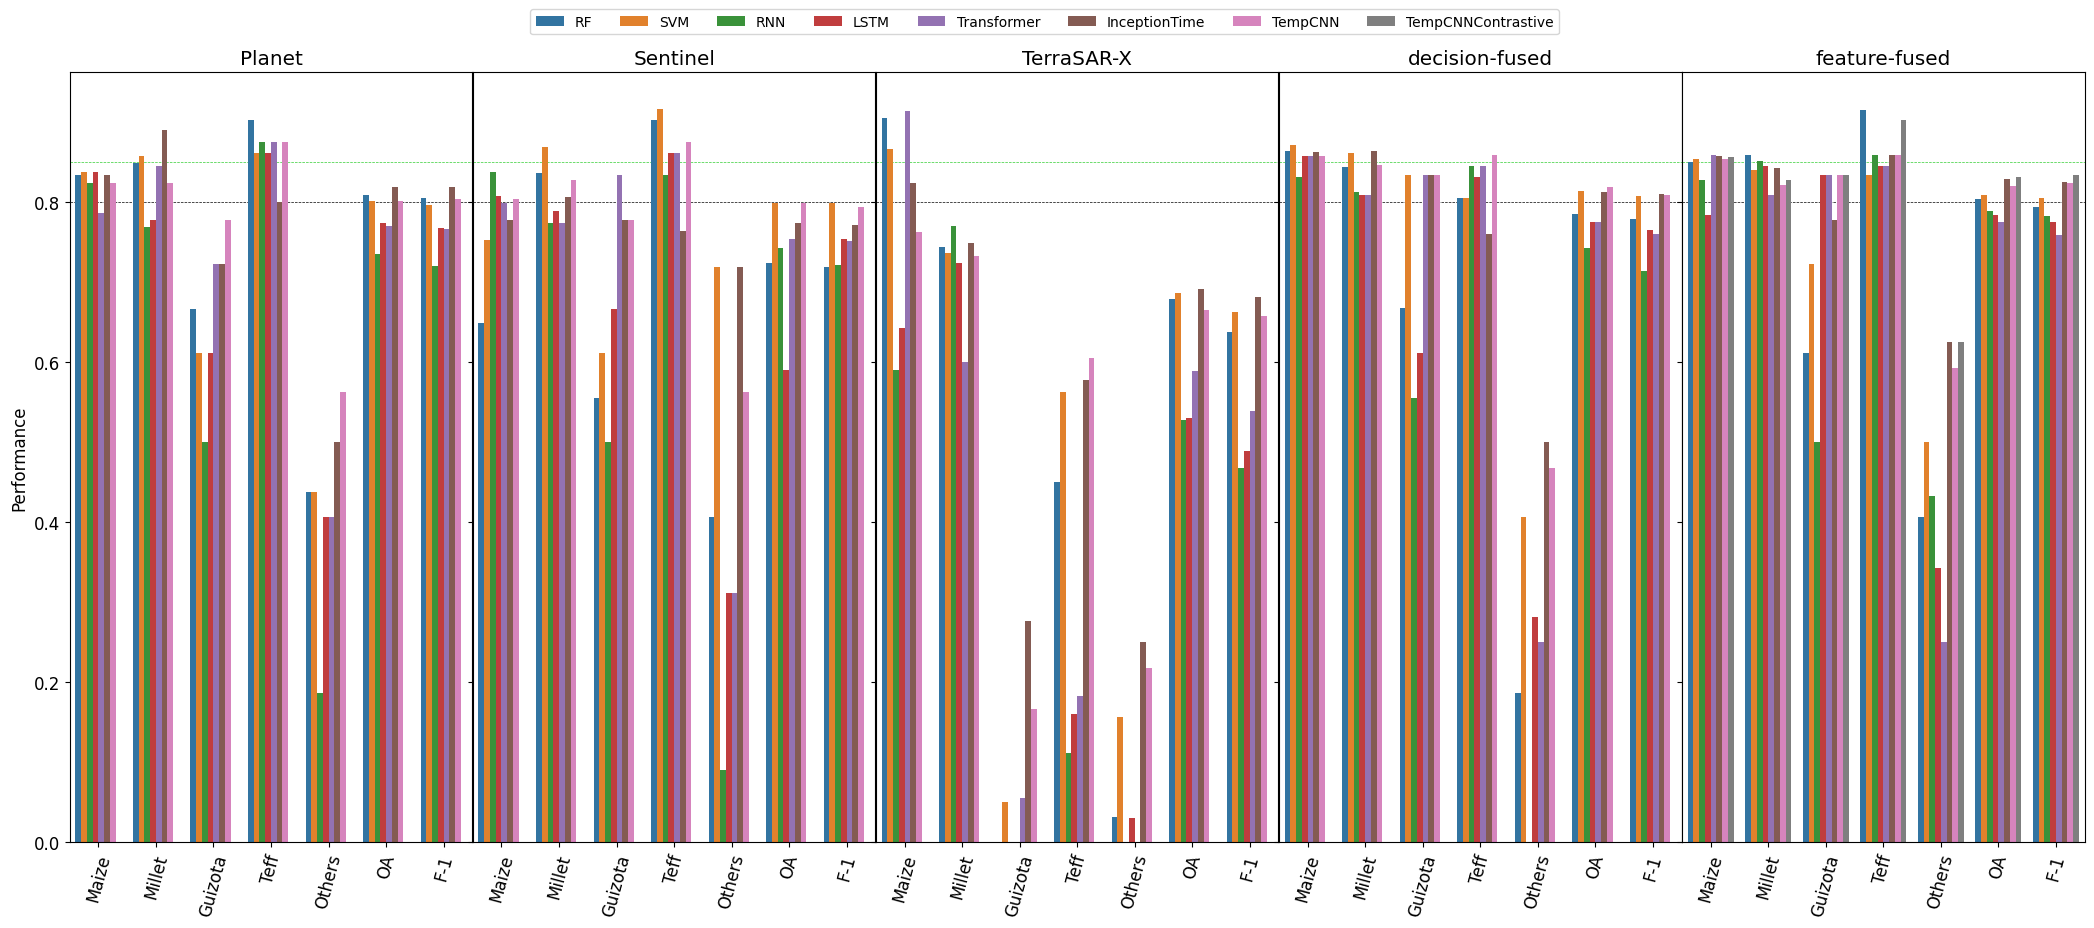

In [32]:
data = sorted(list(np.unique(df['Data'])))
fig, ax = plt.subplots(1,5, figsize=(26,10), sharex=True, sharey=True)
for i in range(len(data)):
    sub = df[df['Data'] == data[i]]
    sns.barplot(data=sub, x = 'Crop', y = 'Obs', hue='Model', ax=ax[i], order = names, hue_order=datasets) # color=palete,
    ax[i].set_title(data[i])
    ax[i].set_xlabel('')
    ax[i].axhline(y=0.8, xmin=0, xmax=3, c="black", linewidth=.5, zorder=0, linestyle='--')
    ax[i].axhline(y=0.85, xmin=0, xmax=3, c="limegreen", linewidth=.5, zorder=0, linestyle='--')
    ax[i].tick_params(axis='x', rotation=75)
handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=8, fontsize=10, bbox_to_anchor=(0.5,0.95)) #  bbox_to_anchor=(0.5,1.28)
plt.subplots_adjust(wspace=0.001, hspace=0.001)
for i in range(5):
    ax[i].get_legend().remove()
    if i >0:
        ax[i].set_ylabel('')
    else:
        ax[i].set_ylabel('Performance')
plt.savefig(f'/Figures/summary_plot/all_performance_h.png', dpi=350, bbox_inches='tight')
plt.show()

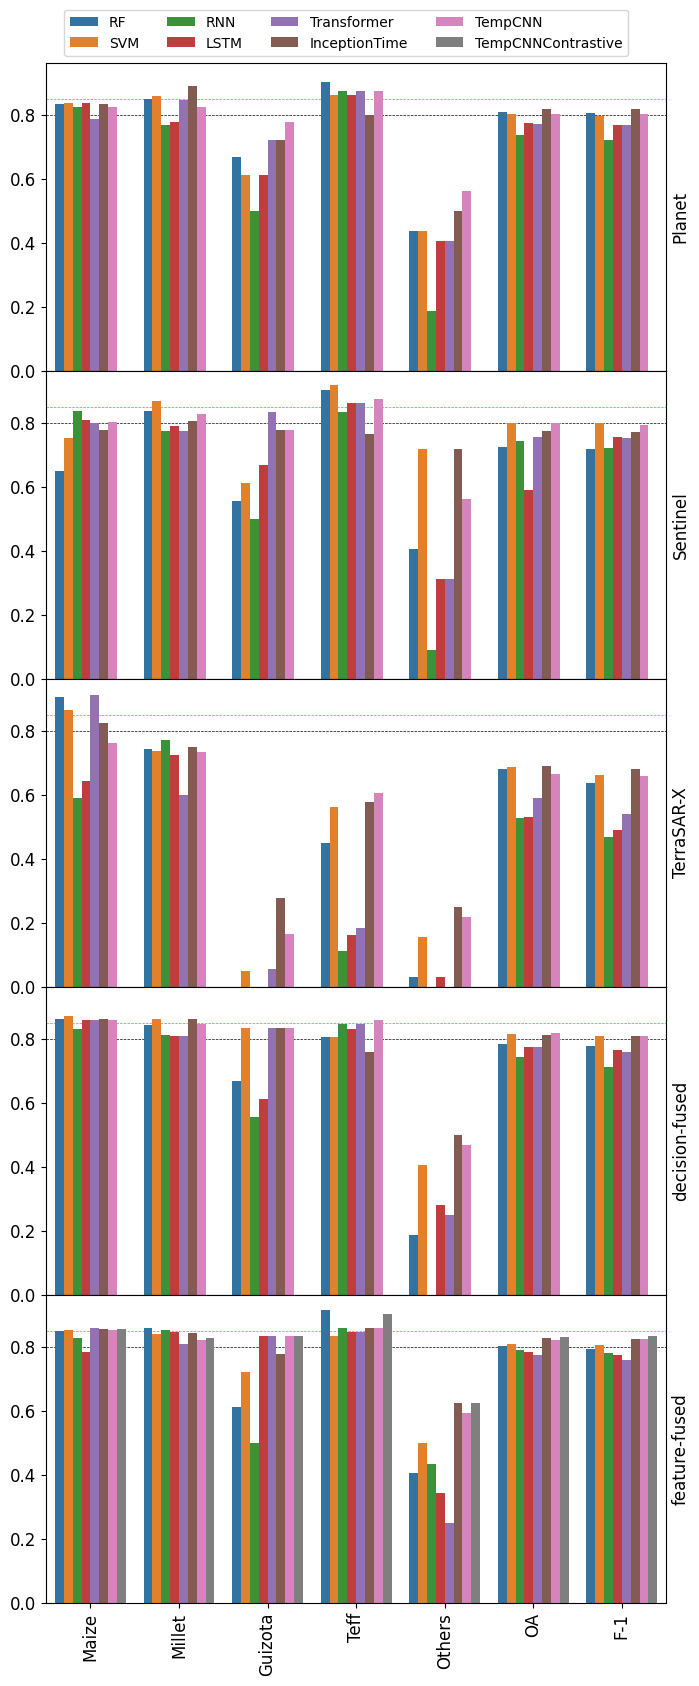

In [33]:
data = sorted(list(np.unique(df['Data'])))
fig, ax = plt.subplots(5,1, figsize=(8,20), sharex=True, sharey=True)
for i in range(len(data)):
    sub = df[df['Data'] == data[i]]
    sns.barplot(data=sub, x = 'Crop', y = 'Obs', hue='Model', ax=ax[i], order = names, hue_order=datasets) # color=palete,
    ax[i].yaxis.set_label_position("right")
    ax[i].set_ylabel(data[i])
# ax.yaxis.tick_right()
    ax[i].set_xlabel('')
    ax[i].axhline(y=0.8, xmin=0, xmax=3, c="black", linewidth=.5, zorder=0, linestyle='--')
    ax[i].axhline(y=0.85, xmin=0, xmax=3, c="limegreen", linewidth=.5, zorder=0, linestyle='--')
    ax[i].tick_params(axis='x', rotation=90)
handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=10, bbox_to_anchor=(0.5,0.91)) #  bbox_to_anchor=(0.5,1.28)
plt.subplots_adjust(wspace=0.001, hspace=0.001)
for i in range(5):
    ax[i].get_legend().remove()
plt.savefig(f'/Figures/summary_plot/all_performance_v.png', dpi=350, bbox_inches='tight')
plt.show()

In [71]:
import seaborn as sns
from scipy.stats import linregress

In [72]:
df = pd.read_csv('/valid_yield.csv')
df.head()

,Crop,Obs,Pred
0,Teff,13.0,10.770871
1,Teff,13.0,14.080189
2,Teff,18.0,12.843666
3,Teff,16.0,12.040472
4,Teff,16.0,12.757720


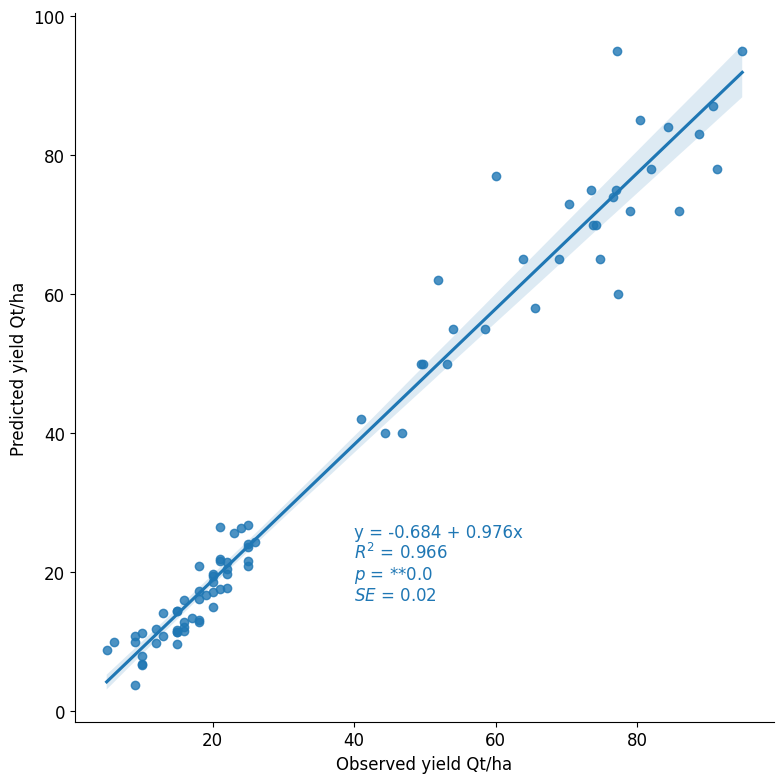

In [115]:
# plot observed and predicted yied
slope, intercept, r, p, sterr = scipy.stats.linregress(x=df['Obs'], y=df['Pred'])
sns.lmplot(x='Obs', y='Pred', data=df,  order=1, height=8, ci=95)
plt.text(40, 25, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x', color='tab:blue')
plt.text(40, 22, '$R^2$ = ' + str(round(r**2,3)), color='tab:blue')
plt.text(40, 19, '$p$ = **' + str(round(p,5)), color='tab:blue')
plt.text(40, 16, '$SE$ = ' + str(round(sterr,3)), color='tab:blue')
plt.xlabel('Observed yield Qt/ha')
plt.ylabel('Predicted yield Qt/ha')
plt.savefig(f'/Figures/summary_plot/global_yield_valid.png', dpi=350, bbox_inches='tight')
plt.show()

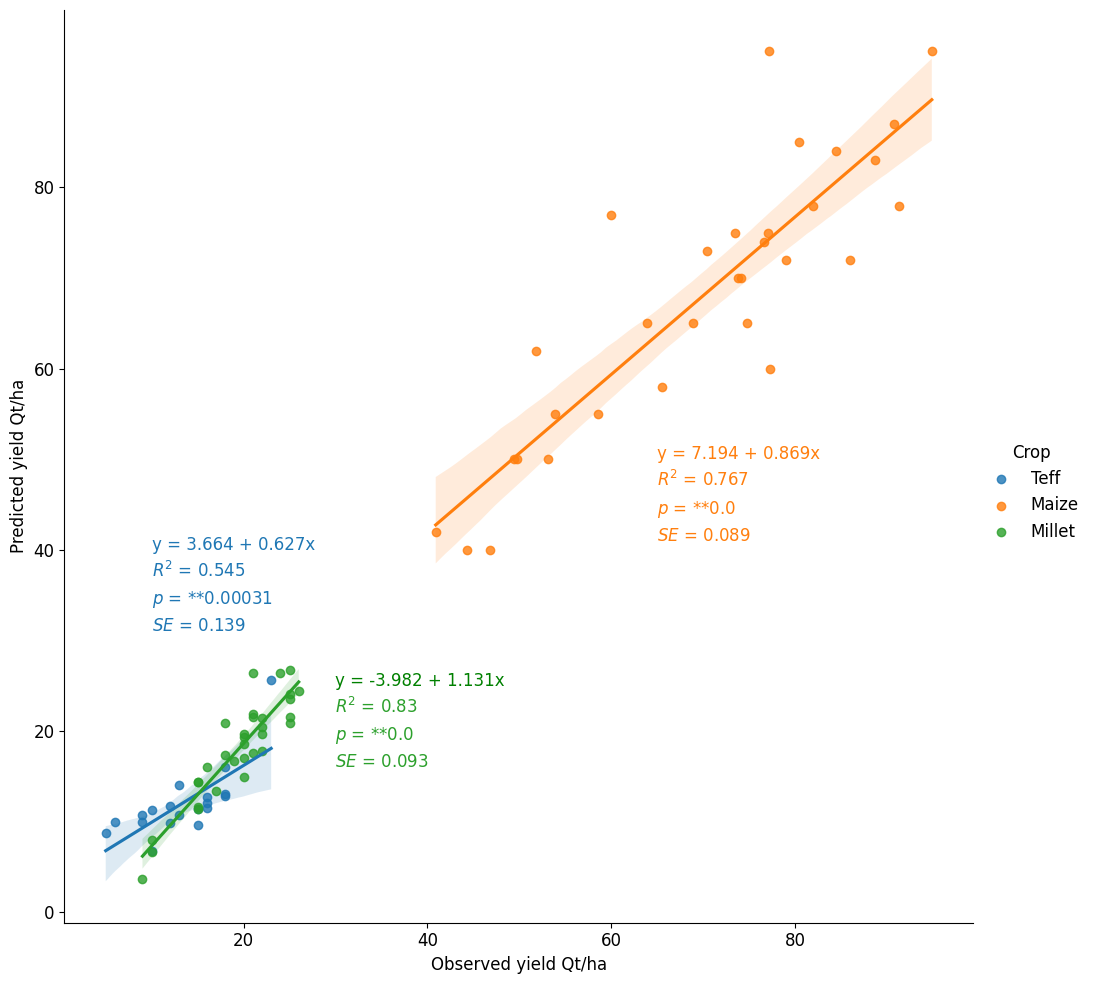

In [116]:
crops = sorted(list(np.unique(df['Crop'])))
subs = [df[df['Crop'] == crop] for crop in crops]
vals = [scipy.stats.linregress(x=sub['Obs'], y=sub['Pred']) for sub in subs]
val_key = {}
for crop in crops:
    val_key[crop] = vals[crops.index(crop)]

sns.lmplot(x='Obs', y='Pred', hue='Crop', data=df,  order=1, height=10, ci=95)
plt.text(65, 50, 'y = ' + str(round(val_key['Maize'].intercept,3)) + ' + ' + str(round(val_key['Maize'].slope,3)) + 'x', color='tab:orange')
plt.text(65, 47, '$R^2$ = ' + str(round(val_key['Maize'].rvalue**2,3)), color='tab:orange')
plt.text(65, 44, '$p$ = **' + str(round(val_key['Maize'].pvalue,5)), color='tab:orange')
plt.text(65, 41, '$SE$ = ' + str(round(val_key['Maize'].stderr,3)), color='tab:orange')

plt.text(10, 40, 'y = ' + str(round(val_key['Teff'].intercept,3)) + ' + ' + str(round(val_key['Teff'].slope,3)) + 'x', color='tab:blue')
plt.text(10, 37, '$R^2$ = ' + str(round(val_key['Teff'].rvalue**2,3)), color='tab:blue')
plt.text(10, 34, '$p$ = **' + str(round(val_key['Teff'].pvalue,5)), color='tab:blue')
plt.text(10, 31, '$SE$ = ' + str(round(val_key['Teff'].stderr,3)), color='tab:blue')

plt.text(30, 25, 'y = ' + str(round(val_key['Millet'].intercept,3)) + ' + ' + str(round(val_key['Millet'].slope,3)) + 'x', color='green')
plt.text(30, 22, '$R^2$ = ' + str(round(val_key['Millet'].rvalue**2,3)), color='tab:green')
plt.text(30, 19, '$p$ = **' + str(round(val_key['Millet'].pvalue,5)), color='tab:green')
plt.text(30, 16, '$SE$ = ' + str(round(val_key['Millet'].stderr,3)), color='tab:green')

plt.xlabel('Observed yield Qt/ha')
plt.ylabel('Predicted yield Qt/ha')

plt.savefig(f'/Figures/summary_plot/local_yield_valid.png', dpi=350, bbox_inches='tight')
plt.show()